In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

# Caso servicio en DC

In [68]:
# Cargamos los datos
targetDcDelay = pd.read_csv("targetDcDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetDcDelay[targetDcDelay.name == 'roundTripTime:vector']
vec = vec[vec.type == "vector"]

# Empezamos el proceso de merging del conjunto de datos
row = vec.iloc[0]
delay_dc = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})

#for i in range(1,len(vec)):
#    row = vec.iloc[i]
#    row = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})
#    mean_delay_dc = pd.concat((mean_delay_dc, row))
#mean_delay_dc = mean_delay_dc.groupby(level=0).mean()

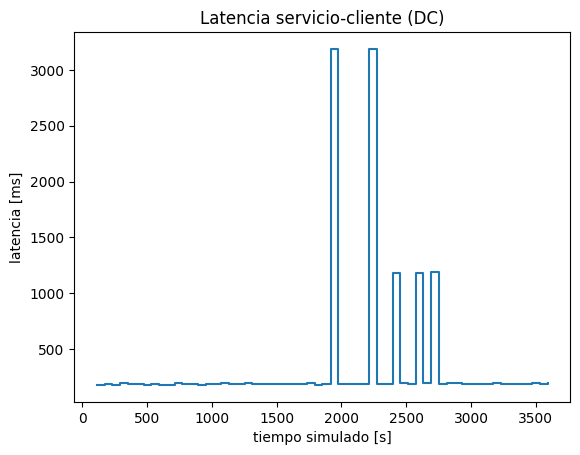

In [69]:
plt.title("Latencia servicio-cliente (DC)")
plt.ylabel("latencia [ms]")
plt.xlabel("tiempo simulado [s]")
plt.plot(delay_dc, drawstyle='steps-post')
plt.show()

## Versión alternativa - Evolución de la media, media ponderada en el tiempo, scatter plot

In [4]:
# Sacamos la evolución de la media a través de las distintas runs
y = running_avg(mean_delay_dc.values)
plt.plot(mean_delay_dc.index, y)

NameError: name 'mean_delay_dc' is not defined

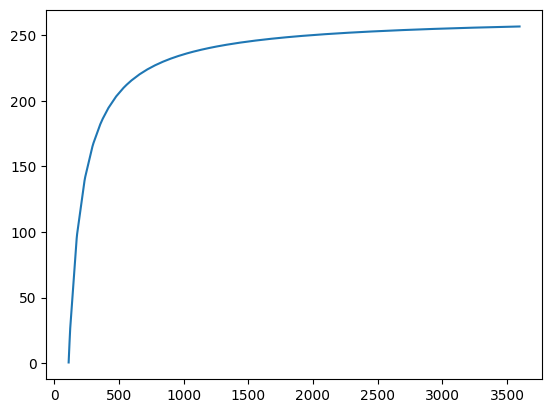

In [7]:
y = running_timeavg(mean_delay_dc.index.to_numpy(), mean_delay_dc.values)
plt.plot(mean_delay_dc.index[1:], y)

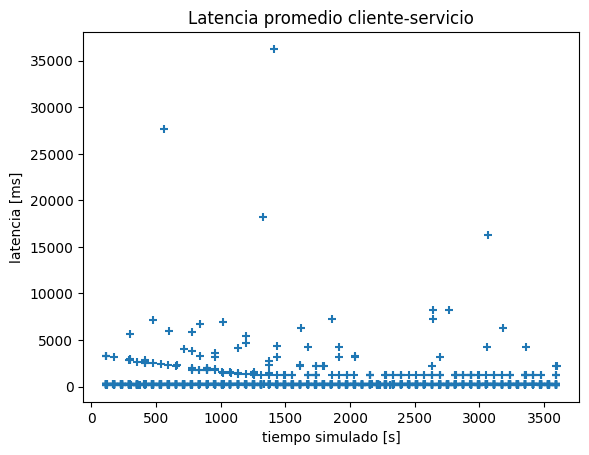

In [8]:
plt.title("Latencia promedio cliente-servicio")
plt.ylabel("latencia [ms]")
plt.xlabel("tiempo simulado [s]")
plt.scatter(mean_delay_dc.index, mean_delay_dc.values, marker='+')
plt.show()

# Caso servicio en Fog

In [70]:
# Cargamos los datos
targetFogDelay = pd.read_csv("targetFogDelay.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Filtramos end-to-end delay +  eliminamos los NaN
vec = targetFogDelay[targetFogDelay.name == 'roundTripTime:vector']
vec = vec[vec.type == "vector"]

# Empezamos el proceso de merging del conjunto de datos
row = vec.iloc[0]
delay_fog = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})

#for i in range(1,len(vec)):
#    row = vec.iloc[i]
#    row = pd.DataFrame(index=row.vectime, data={'delay' : row.vecvalue*1000})
#    mean_delay_fog = pd.concat((mean_delay_fog, row), axis=1)

# Aplicamos la media
#mean_delay_fog = mean_delay_fog.mean(axis=1)

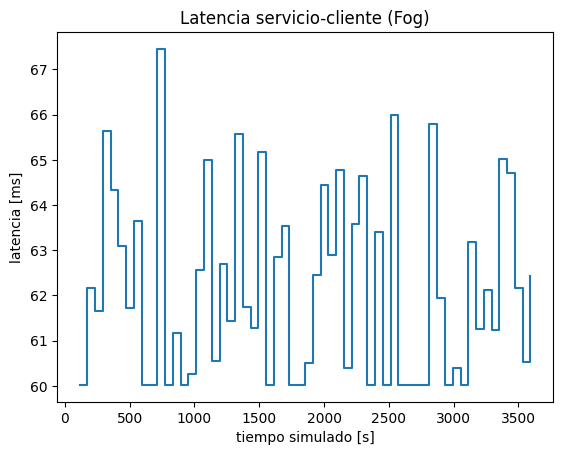

In [71]:
plt.title("Latencia servicio-cliente (Fog)")
plt.ylabel("latencia [ms]")
plt.xlabel("tiempo simulado [s]")
plt.plot(delay_fog, drawstyle='steps-post')
plt.show()

# Comparativa Dc vs Fog

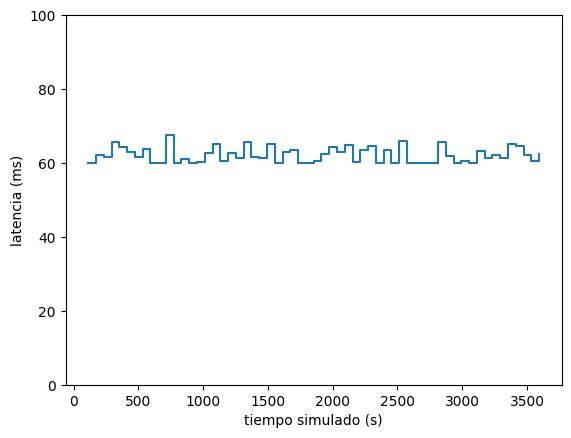

In [72]:
#plt.title("Latencia servicio-cliente")
plt.ylabel("latencia (ms)")
plt.xlabel("tiempo simulado (s)")
plt.plot(delay_dc, drawstyle='steps-post', label="Cloud")
ax = plt.gca()
ax.set_ylim([0,4000])
plt.gcf().savefig("smallDelaysDc.pdf", bbox_inches='tight')

# Reset
plt.clf()

# Dump the small one
plt.ylabel("latencia (ms)")
plt.xlabel("tiempo simulado (s)")
plt.plot(delay_fog, drawstyle='steps-post', label= "Fog")
ax = plt.gca()
ax.set_ylim([0,100])
plt.gcf().savefig("smallDelaysFog.pdf", bbox_inches='tight')

# Estadísticas comparativas

In [73]:
delay_dc.describe()

,delay
count,59.000000
mean,341.024219
std,580.916254
min,180.020899
25%,185.492083
50%,189.197542
75%,193.292283
max,3187.000576


In [74]:
delay_fog.describe()

,delay
count,59.000000
mean,62.164037
std,2.039729
min,60.019718
25%,60.021011
50%,61.738897
75%,63.554986
max,67.452726
